In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def retrieve_acc(filename):
    train_acc = []
    val_acc = []
    
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("train Loss"):
                train_acc.append(float(line.split(":")[-1]))
                # print(line)
            if line.startswith("val Loss"):
                val_acc.append(float(line.split(":")[-1]))
            # print(line)

    return train_acc, val_acc

# 1. Regular Dataset Transformer with CELoss

## Frozen

In [8]:
filename = './transformer_frozen_acc.txt'
frozen_train_acc, frozen_val_acc = retrieve_acc(filename)

print(len(frozen_train_acc))
print(len(frozen_val_acc))

40
40


## Unfrozen

In [9]:
filename = './transformer_unfrozen_acc.txt'
unfrozen_train_acc, unfrozen_val_acc = retrieve_acc(filename)

print(len(unfrozen_train_acc))
print(len(unfrozen_val_acc))

40
40


# 1. Triplet Dataset Transformer with CELoss + TripletLoss

## Frozen

In [10]:
filename = './transformer_triplet_frozen_acc.txt'
frozen_triplet_train_acc, frozen_triplet_val_acc = retrieve_acc(filename)

print(len(frozen_triplet_train_acc))
print(len(frozen_triplet_val_acc))

40
40


## Observing max validation accuracies

In [19]:
print(f"Triplet: {max(frozen_triplet_val_acc)}")
print(f"Frozen: {max(frozen_val_acc)}")
print(f"Unfrozen: {max(unfrozen_val_acc)}")

Triplet: 0.8922
Frozen: 0.8725
Unfrozen: 0.6912


## Plotting

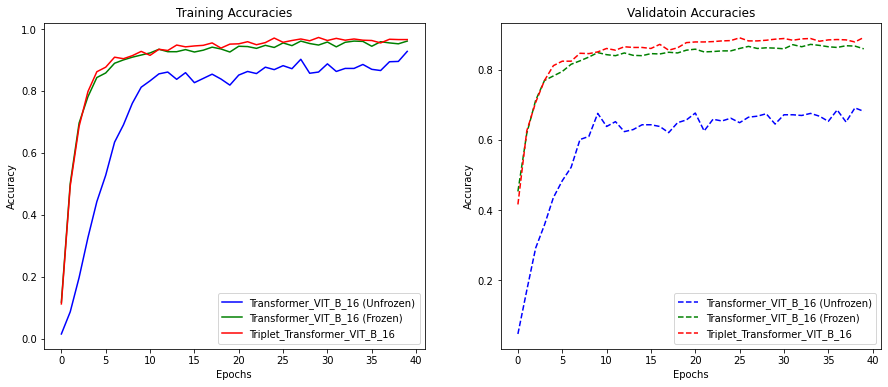

In [15]:
epochs = 40
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot training accuracies
ax1.plot(range(epochs), unfrozen_train_acc, 'b', label='Transformer_VIT_B_16 (Unfrozen)')
ax1.plot(range(epochs), frozen_train_acc, 'g', label='Transformer_VIT_B_16 (Frozen)')
ax1.plot(range(epochs), frozen_triplet_train_acc, 'r', label='Triplet_Transformer_VIT_B_16')
ax1.set_title('Training Accuracies')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot validation accuracies
ax2.plot(range(epochs), unfrozen_val_acc, 'b--', label='Transformer_VIT_B_16 (Unfrozen)')
ax2.plot(range(epochs), frozen_val_acc, 'g--', label='Transformer_VIT_B_16 (Frozen)')
ax2.plot(range(epochs), frozen_triplet_val_acc, 'r--', label='Triplet_Transformer_VIT_B_16')
ax2.set_title('Validatoin Accuracies')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()